# Belajar Algoritma Mechine Learning dengan Menggunkan Linear Regression



---

---

Pada Hal ini, saya mempelajari mengenai suatu algoritma didalam mechine learning yaitu algoritma Linear regression.

Apa itu linear regression ? liner regression adalah suatu mentode dalam statistika untuk melihat hubungan antara variabel bebas dan variabel terikat.Dalam hal ini bertujuan membuat persamaan linear untuk memprediksi suatu data.



Sebagai latihan untuk implementasinya, disini saya mempunyai dua data yaitu data train dan data test. kedua data ini kita jadikan sebagai acuan untuk pembelajaran untuk memprediksi keuntungan penjualan kue yang dimana jumlah kue yang dijual ada di data test. dan kedua data ini saya format dalam bentuk csv. Berikut hasilnya :

In [5]:
# Import modul yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [6]:
# Membaca file data train
data_train = pd.read_csv("Data_Train.csv", sep = ";")

In [7]:
# membaca file data test
data_test = pd.read_csv("Data_Test.csv", sep = ';')

In [8]:
# menampilkan data train
data_train

,Jumlah Kue,Keuntungan
0,34.0,"Rp1.000.000,00"
1,22.0,"Rp660.000,00"
2,53.0,"Rp65.500.000,00"
3,67.0,"Rp40.000,00"
4,32.0,"Rp45.000.000,00"
5,78.0,"Rp4.500.000,00"
6,34.0,"Rp230.000,00"
7,23.0,"Rp32.000.000,00"
8,56.0,"Rp4.200.000,00"
9,NaN,NaN


In [9]:
# menampilkan data test
data_test

,Jumlah Kue,Keuntungan
0,120,NaN


----

---

# Cleanning Data

Cek missing values

In [10]:
# Menghitung banyaknya data kosong pada data train
data_train.isnull().sum()

Jumlah Kue    4
Keuntungan    4
dtype: int64

In [11]:
# Menghapus data kosong pada data train
data_train.dropna(inplace= True)

In [12]:
# Meghapus kolom Keuntungan pada kolom data test 
data_test = data_test.drop("Keuntungan", axis=1)

Pembersihan kolom unik pada data

In [13]:
# Menampilkan kolom yang unik pada data train
for col in data_train.select_dtypes(include = ['float','object']).columns :
    print(col)
    print(data_train[col].unique())
    print()

Jumlah Kue
[34. 22. 53. 67. 32. 78. 23. 56.]

Keuntungan
[' Rp1.000.000,00 ' ' Rp660.000,00 ' ' Rp65.500.000,00 ' ' Rp40.000,00 '
 ' Rp45.000.000,00 ' ' Rp4.500.000,00 ' ' Rp230.000,00 '
 ' Rp32.000.000,00 ' ' Rp4.200.000,00 ']



In [14]:
# Membersihkan kolom yang unik tersebut dengan replace
data_train['Keuntungan'] = data_train['Keuntungan'].str.replace('Rp','')
data_train['Keuntungan'] = data_train['Keuntungan'].str.replace(',','')
data_train['Keuntungan'] = data_train['Keuntungan'].str.replace('.','')
data_train['Keuntungan'] = data_train['Keuntungan'].str.replace(' ','')

In [15]:
data_train

,Jumlah Kue,Keuntungan
0,34.0,100000000
1,22.0,66000000
2,53.0,6550000000
3,67.0,4000000
4,32.0,4500000000
5,78.0,450000000
6,34.0,23000000
7,23.0,3200000000
8,56.0,420000000


Merapikan format data

In [16]:
# Melakukan pengecekkan format data 
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Jumlah Kue  9 non-null      float64
 1   Keuntungan  9 non-null      object 
dtypes: float64(1), object(1)
memory usage: 216.0+ bytes


In [17]:
# Melakukan perubahan type data kolom jumlah kue object ---> numeric
data_train['Jumlah Kue'] = pd.to_numeric(data_train['Jumlah Kue'])

In [18]:
# Melakukan perubahan type data kolom jumlah kue object ---> numeric
data_train['Keuntungan'] = pd.to_numeric(data_train['Keuntungan'])

In [19]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 8
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Jumlah Kue  9 non-null      float64
 1   Keuntungan  9 non-null      int64  
dtypes: float64(1), int64(1)
memory usage: 216.0 bytes


# Visualisasi Data

<Axes: >

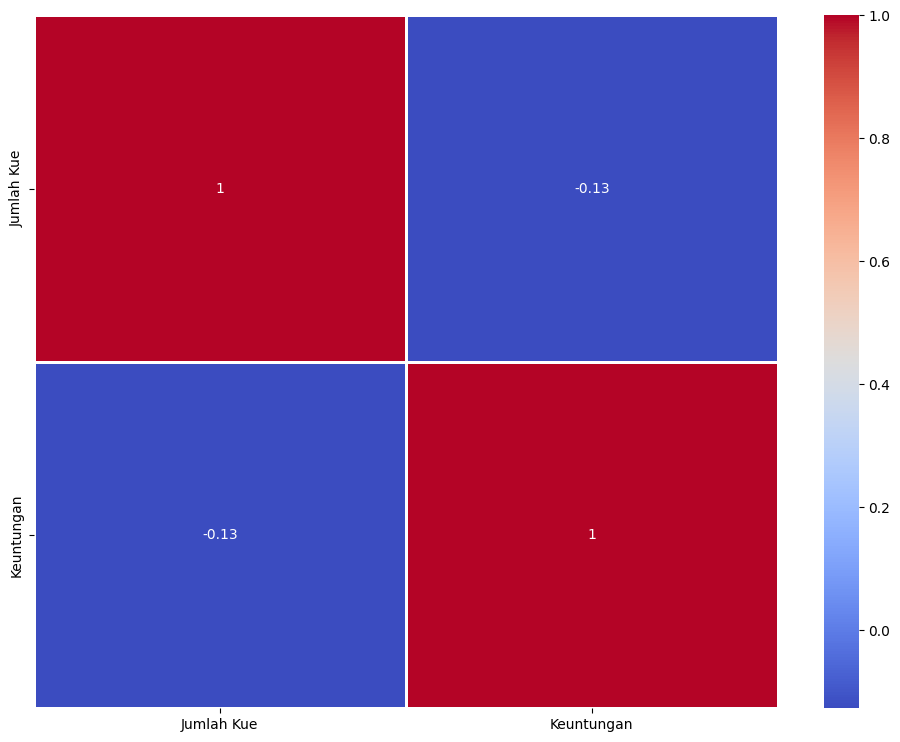

In [20]:
# Melihat Korelasi antar kolom

plt.figure(figsize=(12,9))

sns.heatmap(data_train.corr(), annot = True, cmap = "coolwarm", linecolor ='white', linewidths=1)

-   Menampilkan 3 Top Keuntungan Tertinggi


In [21]:
# Menampilkan 3 Top Keuntungan Tertingi
Best = data_train.groupby('Jumlah Kue')['Keuntungan'].sum().reset_index()
Top3 = Best.nlargest(3,'Keuntungan')
Top3 



,Jumlah Kue,Keuntungan
4,53.0,6550000000
2,32.0,4500000000
1,23.0,3200000000


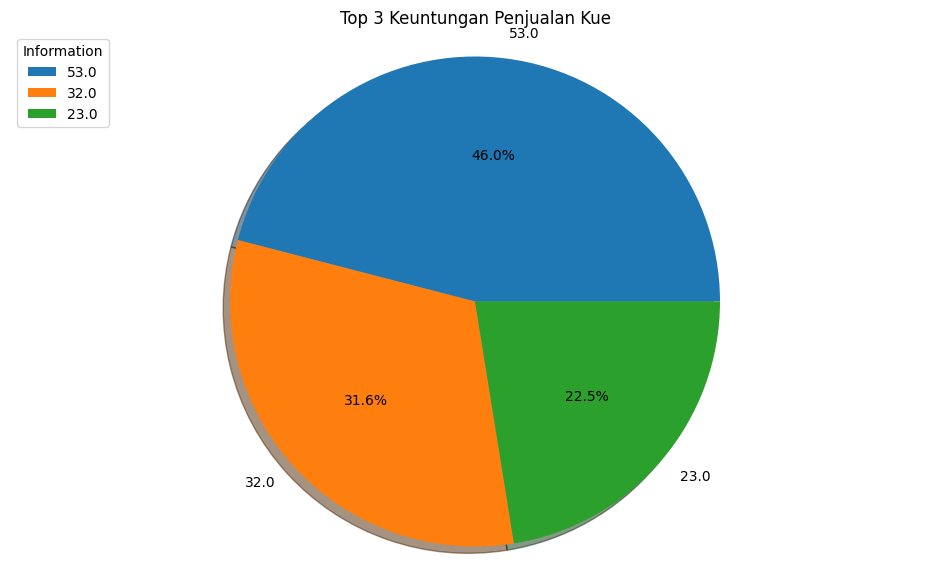

In [22]:

plt.figure(figsize=(12,7))
plt.pie(Top3['Keuntungan'], labels=Top3['Jumlah Kue'], shadow= True, autopct="%1.1f%%")
plt.title('Top 3 Keuntungan Penjualan Kue')
plt.legend(title = 'Information', loc = 'upper left')

plt.axis('equal')
plt.show()

- Melihat Hubungan Antar Dua Kolom

In [23]:
visual = go.Figure()
visual.add_trace(go.Scatter(x = data_train['Jumlah Kue'], y = data_train['Keuntungan'], mode='markers'))
visual.update_layout(title = "Perkembangan Perusahaan",
                     xaxis_title = 'Jumlah Kue',
                     yaxis_title = 'Jumlah Keuntungan')

visual.show()

-----

---

# Modelling

- Membuat Model

In [24]:

x = np.asanyarray(data_train['Jumlah Kue']).reshape((-1,1)) # Memngubag kolom Jumlah Kue Menjadi 2 Dimensi

y = np.asanyarray(data_train['Keuntungan']) # Sebagai Data Target

In [25]:
# Membagi data 
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size= 0.2 , random_state=41)

In [26]:
# Melatih Model
model = LinearRegression() # Model yang digunakan
model.fit(x,y)


LinearRegression()

In [27]:
# Melakukan uji coba dengan cara manual

uji_coba = np.array([[120]]) # step mengubah 1D ---> 2D

prediksi = np.array(uji_coba)

print(f'Perkiraan keuntungan = {model.predict(prediksi)}')

Perkiraan keuntungan = [5.20388889e+08]


- Melakukan prediksi dengan menggunakan data test

In [28]:
test = np.array([data_test['Jumlah Kue']]) # step mengubah 1D ---> 2D
prediksi_keuntungan = model.predict(test) 

In [29]:
print(f'Perkiraan keuntungan = {round(prediksi_keuntungan[0]):,}')

Perkiraan keuntungan = 520,388,889


----

----

# Kesimpulan

Dari apa yang telah dilakukan dimana proses melakukan modeling untuk memprediksi penjualan kue dengan menggunakan menchine Learning menggunakan algoritma Liner regression dapat diambil kesimpulan, bahwa penjualan kue dengan jumlah kue sebesar 120 kue meraih keuntungan berdasarkan hasil prediksi menggunakan algoritma tersebut sebesar Rp.520,388,889 (Lima Ratus Dua Puluh Juta Tiga Ratus Delapan Puluh Delapan Ratus Delapan Puluh Delapan Sembilan Rupiah)